In [1]:
import csv
import emoji
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


%matplotlib inline

2024-06-11 21:22:39.423301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 21:22:39.423452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 21:22:39.547826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-11 21:22:39.868626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 21:22:43.941726: W tensorflow/compiler/tf2

In [2]:
def read_csv(filename):
    phrase = []
    emoji = []

    with open(filename) as emoji_data:
        csvReader = csv.reader(emoji_data)
        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)
    return X, Y

In [3]:
X_train, Y_train = read_csv('./dataset/train_emoji.csv')
X_test, Y_test = read_csv('./dataset/test_emoji.csv')

In [4]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

Y_train_oh = convert_to_one_hot(Y_train, C=5)
Y_test_oh = convert_to_one_hot(Y_test, C=5)

In [5]:
emoji_dictionary = {
    "0": ":heart_with_arrow:",
    "1": ":baseball:",
    "2": ":smile:",
    "3": ":disappointed:",
    "4": ":fork_and_knife:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)],  language='alias')

In [6]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much 💘
food is life 🍴
I love you mum 💘
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


In [7]:
def read_glove_vecs(filename):
    with open(filename, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [8]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('../../datasets/glove.6B.50d.txt')

In [9]:
def embed_sentences(sentence):
    counter = 0
    words = sentence.lower().split()
    embedding = np.zeros((50,))
    for w in words:
        if w in list(word_to_vec_map.keys()):
            counter += 1
            embedding += word_to_vec_map[w]
    if counter > 0:
        embedding /= counter
    return embedding

In [10]:
X_train_embed = np.array([embed_sentences(x) for x in X_train])
X_test_embed = np.array([embed_sentences(x) for x in X_test])

In [11]:
emoji_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(50,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

emoji_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = emoji_model.fit(X_train_embed, Y_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_embed, Y_test), verbose=1)


2024-06-11 21:23:14.037123: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 21:23:14.363688: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 21:23:14.363783: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 21:23:14.367925: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 21:23:14.368110: I external/local_xla/xla/stream_executor

Epoch 1/100


2024-06-11 21:23:18.357095: I external/local_xla/xla/service/service.cc:168] XLA service 0x559a6b0e0a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-11 21:23:18.357171: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-06-11 21:23:18.382247: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-11 21:23:18.443424: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1718121198.626957    2532 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 3s 84ms/step - loss: 1.6365 - accuracy: 0.1818 - val_loss: 1.5468 - val_accuracy: 0.3214
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 1.5182 - accuracy: 0.3106 - val_loss: 1.4815 - val_accuracy: 0.3571
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 1.4563 - accuracy: 0.3333 - val_loss: 1.4490 - val_accuracy: 0.3750
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 1.4022 - accuracy: 0.3409 - val_loss: 1.4158 - val_accuracy: 0.3214
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 1.3525 - accuracy: 0.3864 - val_loss: 1.4002 - val_accuracy: 0.3214
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 1.2983 - accuracy: 0.4318 - val_loss: 1.3868 - val_accuracy: 0.3571
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 1.2413 - accuracy: 0.4848 - val_loss: 1.3698 - val_accuracy: 0.3571
Epoch 8/100
5/5 [===============

In [12]:
emoji_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15109 (59.02 KB)
Trainable params: 15109 (59.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


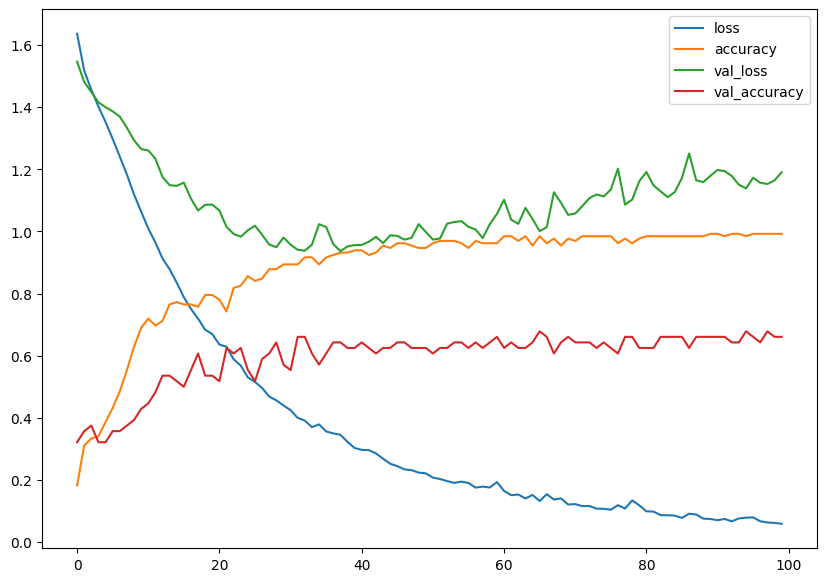

In [13]:
history_dict = history.history
graph = pd.DataFrame(history_dict).plot(figsize=(10, 7))
